# SI 670 Assignment 3 - Linear classifiers, evaluation methods, and grid search (75 points total)

In this assignment you will train several linear classifier models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud). Then you'll perform a grid search to find optimal parameters. 
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [3]:
import numpy as np
import pandas as pd

### Question 1 (5 points)
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [4]:
def answer_one():
    # YOUR CODE HERE
    fraud = pd.read_csv('fraud_data.csv')
    class_counts = pd.DataFrame(fraud['Class'].value_counts())
    total_class = len(fraud['Class'])
    m = class_counts.iloc[1]['Class']
    return m/total_class

answer_one()

0.016410823768035772

In [5]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2 (10 points)

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [6]:
#--The dummy classifier is the sanity check to compare your data against (compare accuracy and recall scores)
#--dummy classifiers look at the labes of the training data

def answer_two():
    # YOUR CODE HERE
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    from sklearn.dummy import DummyClassifier
    
    # train a dummy classifier - trains majority class of training data
    dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    y_dummy_predictions = dummy_majority.predict(X_test)
    y_dummy_predictions
    
    # show accuracy of the classifier
    accuracy_score = accuracy_score(y_test, y_dummy_predictions)
    
    # show recall of the classifier
    recall_score = recall_score(y_test, y_dummy_predictions)
    
    return (accuracy_score, recall_score)

answer_two()

# 98.5% of the transactions were noted as not being fraud. Since not fraud was assigned the majority label, we assigned everything 
# not fraud, meaning we did not detect the class we were looking for - fraud

(0.9852507374631269, 0.0)

### Question 3 (10 points)

Using X_train, X_test, y_train, y_test (as defined above), train a linear support vector classifier using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [7]:
#--SVM pros - faster prediction compared to Naive Bayes and use less memory b/c they use a subset of training points in the decision phase
#--SVM cons - not as suitable for large datasets b/c of the high training time, especially compared to Niave Bayes, also not good w/ overlapping classes

def answer_three():
    # YOUR CODE HERE
#     from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    from sklearn import metrics
    from sklearn import svm

    
    #--Create svm classifier and train with training data--
    clf = svm.SVC(kernel='linear').fit(X_train, y_train)
    
    #--Predict response of test data--
    y_pred = clf.predict(X_test)
#     print(y_pred)


    #--Calculate score values--
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    recall = metrics.recall_score(y_test, y_pred)
    
    precision = metrics.precision_score(y_test, y_pred)

    return (accuracy, recall, precision)
    

answer_three()

(0.9961283185840708, 0.7625, 0.9682539682539683)

### Question 4 (10 points)

Using the non-linear support vector classifier with parameters `{'C': 1e9, 'gamma': 2e-07}`, what is the confusion matrix when using a threshold of -230 on the decision function? Use X_test and y_test. Use the SVC classifier with default RBF kernel (not linear kernel)

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [36]:
#--nonlinear kernel will take longer to train and test than a linear kernel
#--C parameter decided margin of width of the SVM classifier: large C=strict classifier, small C=misclassified examples

def answer_four():
    
    from sklearn.metrics import confusion_matrix
    import numpy as np
    import pandas as pd
    from sklearn import metrics
    from sklearn import svm
    
    #--Create Support Vector Classifier--
    clf = svm.SVC(C=1e9, kernel='rbf', gamma=2e-07).fit(X_train, y_train)
    y_score = clf.decision_function(X_test) #this is a list
    y_svm_predict = y_score > -230 # True=1, False=0 <---this changes the decision function cutoff
    
    #--Create Consufion Matrix--
    confusion = confusion_matrix(y_test, y_svm_predict)
    return confusion
    
answer_four()

array([[5310,   34],
       [  14,   66]])

### Question 5 (20 points)

Train a logistic regression classifier with default parameters using X_train and y_train.

For the logistic regression classifier, create (1) a precision-recall curve and (2) a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the ROC curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*
*You should also includce code to generate the precision/recall and ROC curves above*

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


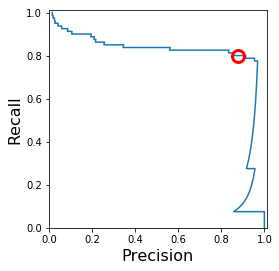

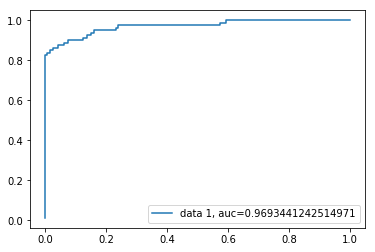

(0.825, 0.9375)

In [65]:
# add code here to train the classifier and plot the P/R and ROC curves
def answer_five():
    

    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.utils.fixes import signature
    from sklearn.metrics import average_precision_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

    #--1. Train Logistic Regression Classifier--
    lreg = LogisticRegression()
    lreg.fit(X_train, y_train)

    # y_pred = lreg.predict(X_test) #this gives 1's and 0's, so don't want this
    y_score = clf.decision_function(X_test) #sklearn will show how precision and recall change as the threshold moves

    #--2. Create a precision-recall curve
    from sklearn.metrics import precision_recall_curve

    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    closest_zero = np.argmin(np.abs(thresholds))
    closest_zero_p = precision[closest_zero]
    closest_zero_r = recall[closest_zero]

    plt.figure()
    plt.xlim([0.0, 1.01])
    plt.ylim([0.0, 1.01])
    plt.plot(precision, recall, label='Precision-Recall Curve')
    plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
    plt.xlabel('Precision', fontsize=16)
    plt.ylabel('Recall', fontsize=16)
    plt.axes().set_aspect('equal')
    plt.show()




    #--3. Create a ROC curve using y_test and the proba estimates for X_test(or, the probability it is fraud)
    plt.figure()
    y_pred_prob = lreg.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob) 
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

    #--Determine recall value when precision == 0.75--
    recall_index = precision.tolist().index(0.75)
    recall_val = recall[recall_index]
    # can also use np.where(np.round(precision,2)==0.75) <-- this will return a numpy array
    # var_name, <---same as doing a reshape

    #--Determine true positive value when false positive rate == 0.16
    tp_index = fpr.round(2).tolist().index(0.16)
    tp_val = tpr[tp_index]


    return (recall_val, tp_val)



answer_five()

### Question 6 (20 points)

(a) (13 points) Perform a grid search over the parameters listed below for a Logistic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C' : [0.01, 0.1, 0.5, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`0.5`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**  	|    ?	|   ? 	|

<br>

*This function should return a 6 by 2 numpy array with 8 floats.* 

*Note: do not return a DataFrame, just the values denoted by `?` in a numpy array.*

In [64]:
def answer_six():    
    # YOUR CODE HERE
    #Source: https://chrisalbon.com/machine_learning/model_selection/hyperparameter_tuning_using_grid_search/
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.utils.fixes import signature
    from sklearn.metrics import average_precision_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
    from sklearn import linear_model, datasets
    from sklearn.model_selection import GridSearchCV

    #--1. Train Logistic Regression Classifier--
    lreg = LogisticRegression()

    #-- Penalty values --
    penalty = ['l1', 'l2'] #trying to minimize penalties: L1=taxi cab, L2=as the crow flys

    #-- Regularization hyperparameter --
    C = [0.01, 0.1, 0.5, 1, 10, 100]

    #-- Create hyperparameters dict --
    hyperparams = dict(C=C, penalty=penalty)

    #-- Perform Grid Search using 3-fold cross validation --
    model = GridSearchCV(lreg, hyperparams, cv=3, verbose=0)
    model.fit(X_train,y_train) #this trains the model for ea possible combo of L1 and L2 for penalty, and all of those for C
    #cv=3 means it does it 3 different times on 3 random splits of X_train and y_train
    y_pred = model.predict(X_test) #fit finds best combo of parameters, predict will use the best combo of parameters to give the best prediction

    
    scores = model.cv_results_['mean_test_score'].reshape((6,2))
    
    return scores

    

answer_six()

array([[0.99422214, 0.99539001],
       [0.99606614, 0.99618907],
       [0.99600467, 0.99618907],
       [0.99606614, 0.9961276 ],
       [0.99588174, 0.9959432 ],
       [0.99588174, 0.99588174]])

(b) (2 points) *What is the optimal combination of penalty setting and C value?*  (You can use the following helper function to visualize the results from your grid search.)

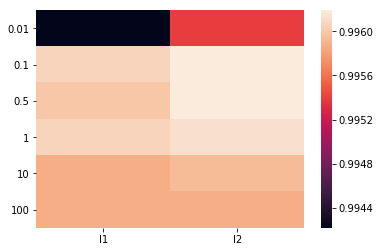

In [66]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib inline
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(6,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 0.5, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())

**L2 penalty where C=0.1 or C=0.5 looks to be like the optimal combination. **

(c) (5 points) Your fraud data was provided by a client who represents a large banking company. What is your final recommendation for the type of classifier and settings they should use to detect fraud in their system -- and why?

Since the client is a large banking company, my recommendation would be to find a classifier that has the highest recall value to ensure that the false positive values are as low as possible - in these cases you would probably want to reduce the amount of times you reach out to customers when there really isn't any fraud (false positive). In the cases above, it seems that the Logistic Regression classifier performed the best with a high recall value. Specifically, it performed well with the L2 penalty where C was between 0.1 and 0.5, giving 99.6%.

In [ ]:
# -- Look at the running time - or the computational cost. Also look at the standard deviation - where the parameters are more stable
# -- Look at standard deviation will help determine how stable the calculations are